In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("placements.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

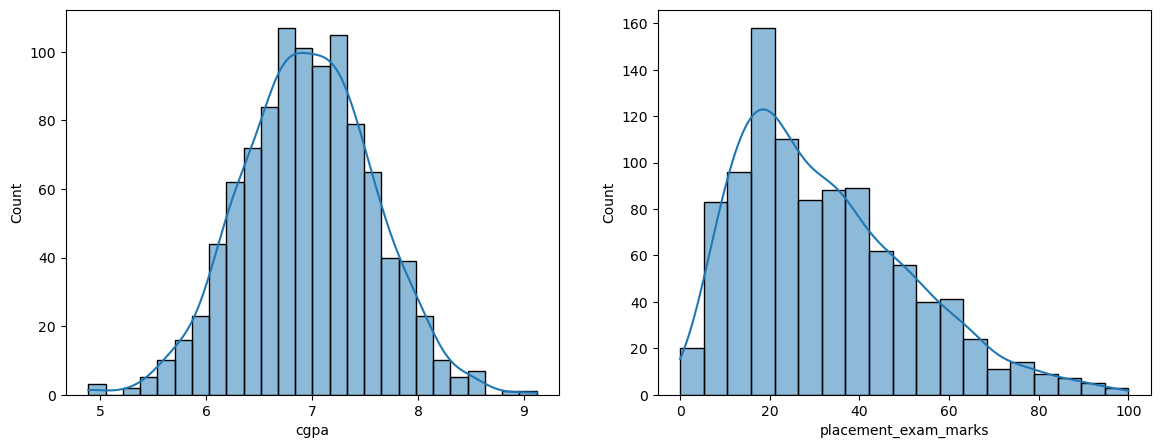

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'],kde=True)
# placement_exam_marks is skewed so we can apply IQR method to detect outliers 

In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

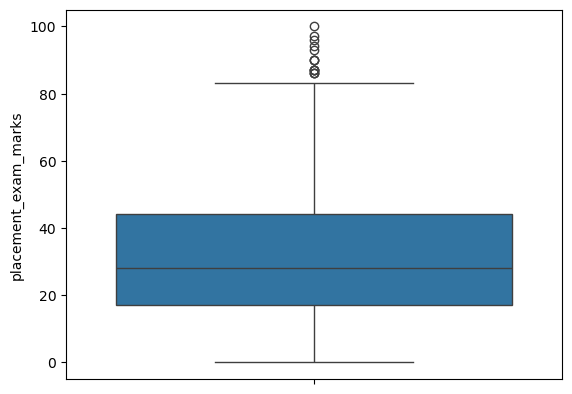

In [20]:
sns.boxplot(df['placement_exam_marks'])

In [13]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [14]:
IQR = percentile75 - percentile25

In [18]:
lower_lmt = percentile25-1.5*IQR
upper_lmt = percentile75+1.5*IQR

In [19]:
# outliersa are
df[(df['placement_exam_marks']<lower_lmt ) | (df['placement_exam_marks']>upper_lmt)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [21]:
new_df_trimmed = df[(df['placement_exam_marks']>lower_lmt) & (df['placement_exam_marks']<upper_lmt)]

In [22]:
new_df_trimmed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

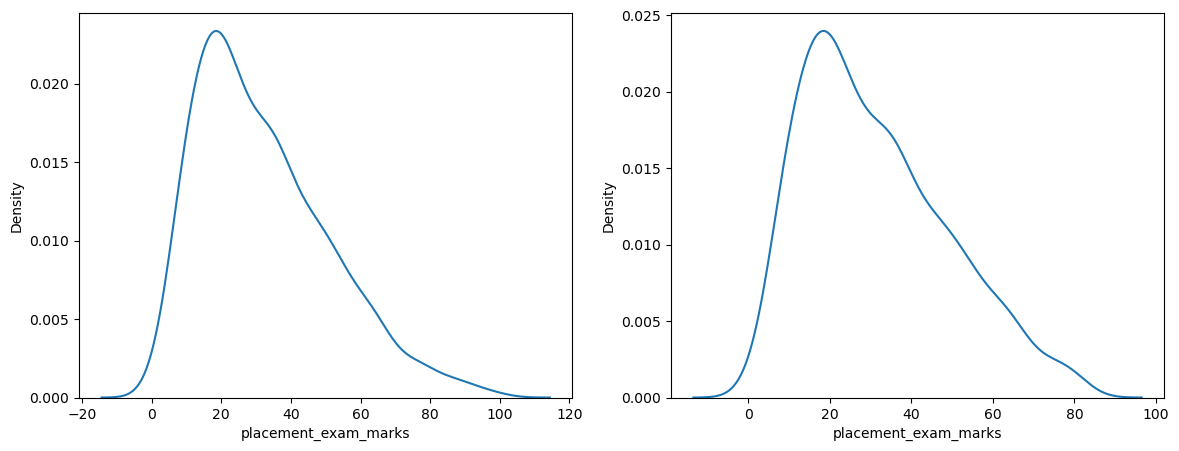

In [25]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(122)
sns.kdeplot(new_df_trimmed['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

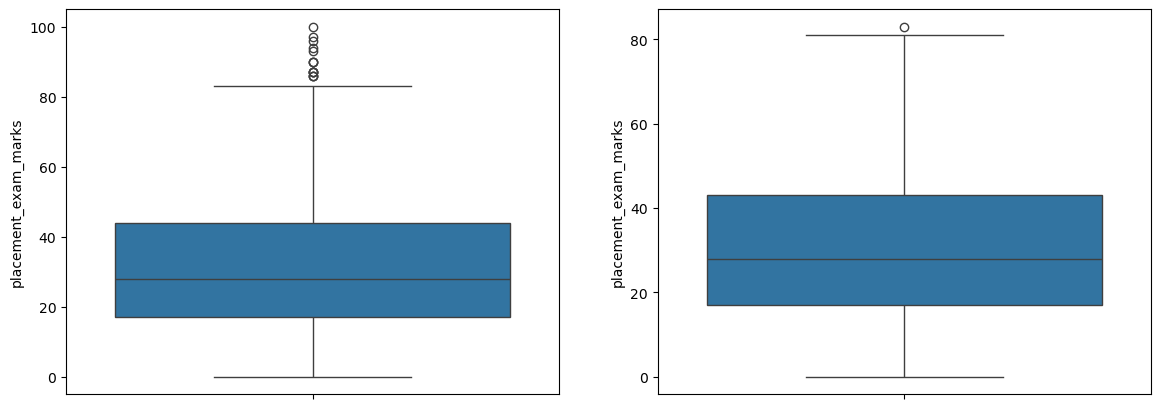

In [39]:
fig = plt.figure(figsize=(14,5))

plt.subplot(121)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(new_df_trimmed['placement_exam_marks'])

### Capping

In [35]:
new_df_capped = df.copy()

In [36]:
new_df_capped['placement_exam_marks'] = np.where(
    new_df_capped['placement_exam_marks'] > upper_lmt,
    upper_lmt,
    np.where(
        new_df_capped['placement_exam_marks']<lower_lmt,
        lower_lmt,
        new_df_capped['placement_exam_marks']
    )
)

In [37]:
new_df_capped.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

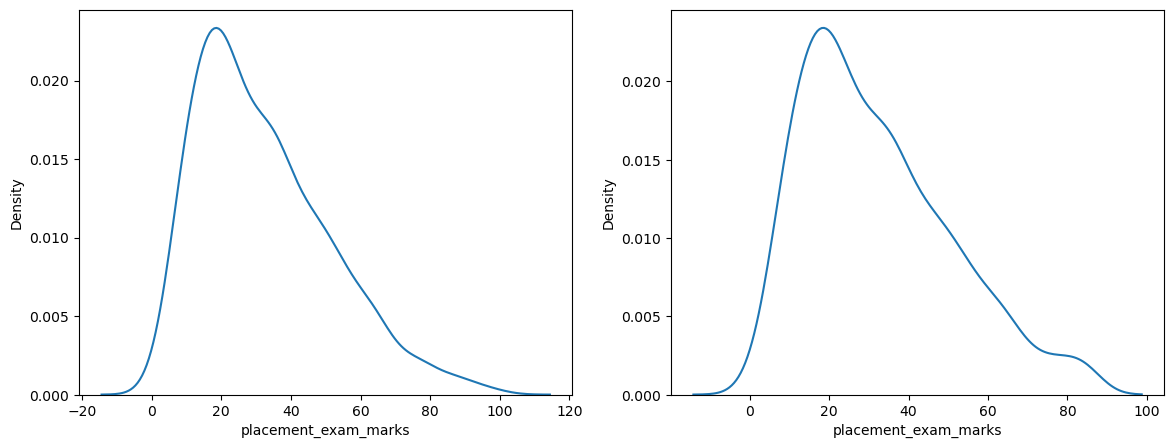

In [38]:
fig = plt.figure(figsize=(14,5))
plt.subplot(121)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(122)
sns.kdeplot(new_df_capped['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

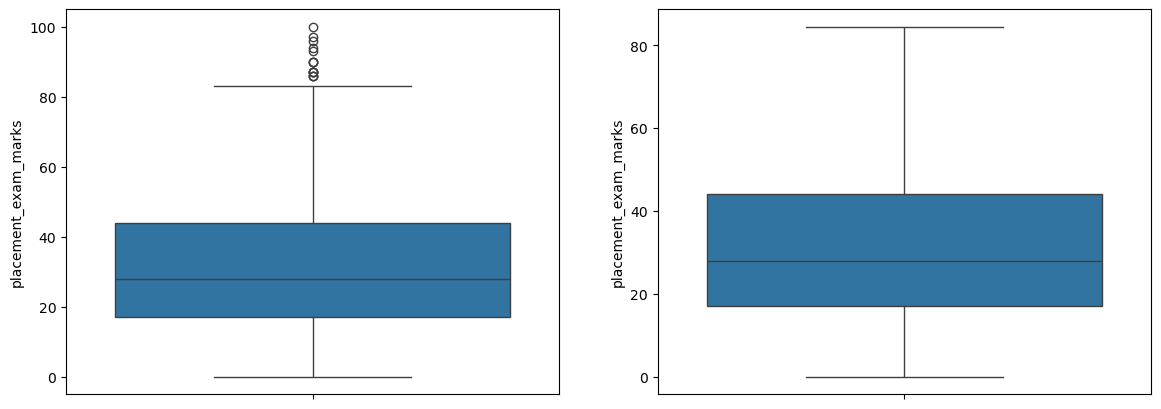

In [42]:
fig = plt.figure(figsize=(14,5))

plt.subplot(121)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(new_df_capped['placement_exam_marks'])